In [7]:
import cmath
import numpy as np
import matplotlib.pyplot
import scipy.fft
import matplotlib.pyplot as plt
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
i = 1j

In [8]:
def test_dft():

    for _ in range(25):
        x = np.random.random(16) + 1j * np.random.random(16)  
        assert np.allclose(naive_dft(x), scipy.fft.fft(x))
        assert np.allclose(fft(x), scipy.fft.fft(x))
        assert np.allclose(naive_ift(x), scipy.fft.ifft(x))
    

def naive_dft(f):
    
    n = len(f)

    hat_f = [0 for _ in range(n)]

    omega_n = np.exp(-2 * np.pi * i / n)
    
    if n <= 1: return f

    # O(n^2) Complexity
    for k in range(n):

        hat_f[k] = sum([f[j] * omega_n ** (j * k) for j in range(n)])

    return hat_f

def naive_ift(hat_f):
    
    n = len(hat_f)

    f = [0 for _ in range(n)]

    omega_n_bar = np.exp(2 * np.pi * i / n)
    
    # O(n^2) Complexity
    for k in range(n):

        f[k] = 1 / n * sum([hat_f[j] * omega_n_bar ** (j * k) for j in range(n)])

    return f

def fft(f):

    n = len(f)

    hat_f = [0 for _ in range(n)]

    if n <= 1: return f

    omega, omega_n = 1, np.exp(-2*np.pi*i/n)

    f_even = [f[i] for i in range(0, n, 2)]
    f_odd = [f[i] for i in range(1, n, 2)]

    hat_f_even = fft(f_even)
    hat_f_odd = fft(f_odd)

    for k in range(n // 2):

        hat_f[k] = hat_f_even[k] + omega * hat_f_odd[k]
        hat_f[k + n // 2] = hat_f_even[k] - omega * hat_f_odd[k]
        omega = omega * omega_n

    return hat_f

# Reference one of Sriram's FFT Lectures
def keep_k_lowest_freqs(hat_f, k):

    n = len(hat_f)

    # We want the 0th frequency, the first k, and the last k (since the first k and last k correspond to the same frequencies since the FFT is ``mirrored'')
    # 0 out the remaining middle elements
    return [hat_f[0]] + hat_f[1:k+1] + [0] * (n-(2*k+1)) + hat_f[n-k:n]


test_dft()

/Users/adithyabhaskara/Library/Python/3.8/lib/python/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


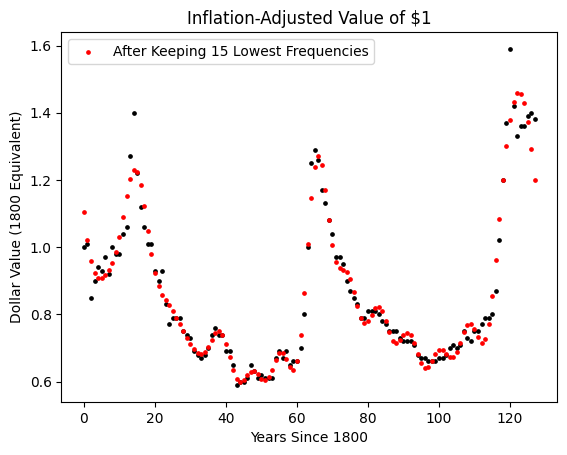

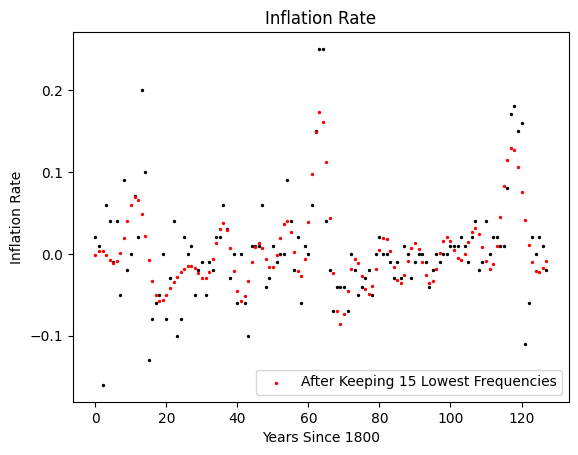

In [9]:
## Data Testing
import pandas as pd

# CSV From https://www.officialdata.org/us/inflation/1800?amount=1

inflation = pd.read_csv("inflation_data.csv")
X = list(inflation.iloc[:, 0].to_numpy()-1800)
dollar = list(inflation.iloc[:, 1].to_numpy())
rate = list(inflation.iloc[:, 2].to_numpy())

dollarfft = fft(dollar)
ratefft = fft(rate)

p = 15
plt.scatter(X, dollar, s=2, color='k', linewidth=2)
plt.scatter(X, scipy.fft.ifft(keep_k_lowest_freqs(dollarfft,p)), s=2, color='r', linewidth=2, label=f'After Keeping {p} Lowest Frequencies')
plt.ylabel("Dollar Value (1800 Equivalent)")
plt.xlabel("Years Since 1800")
plt.legend(loc='best')
plt.title("Inflation-Adjusted Value of $1")
plt.show()

plt.scatter(X, rate, s=2, color='k')
plt.scatter(X, scipy.fft.ifft(keep_k_lowest_freqs(ratefft,p)), s=2, color='r', label=f'After Keeping {p} Lowest Frequencies')
plt.ylabel("Inflation Rate")
plt.xlabel("Years Since 1800")
plt.legend(loc='best')
plt.title("Inflation Rate")
plt.show()

/Users/adithyabhaskara/Library/Python/3.8/lib/python/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


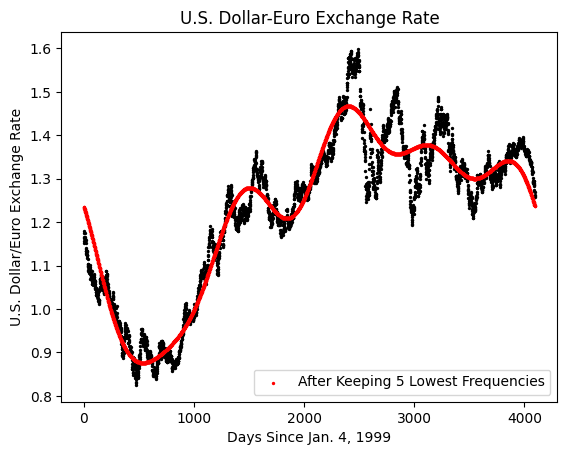

In [10]:
## Data Testing
import pandas as pd

# CSV From https://data.ecb.europa.eu/data/datasets/EXR/EXR.D.USD.EUR.SP00.A?chart_props=W3sibm9kZUlkIjoiMzIyNDUxIiwicHJvcGVydGllcyI6W3siY29sb3JIZXgiOiIiLCJjb2xvclR5cGUiOiIiLCJjaGFydFR5cGUiOiJsaW5lY2hhcnQiLCJsaW5lU3R5bGUiOiJTb2xpZCIsImxpbmVXaWR0aCI6IjEuNSIsImF4aXNQb3NpdGlvbiI6ImxlZnQiLCJvYnNlcnZhdGlvblZhbHVlIjpmYWxzZSwiZGF0ZXMiOlsiMjAwMC0wMS0wMVQwNzowMDowMC4wMDBaIiwiMjAyNC0wMS0wMVQwNzowMDowMC4wMDBaIl0sImlzVGRhdGEiOmZhbHNlLCJtb2RpZmllZFVuaXRUeXBlIjoiIiwieWVhciI6ImRhdGV3aXNlIiwic3RhcnREYXRlIjoiMTk5OS0xMi0zMSIsImVuZERhdGUiOiIyMDIzLTEyLTMxIiwic2V0RGF0ZSI6dHJ1ZSwic2hvd1RhYmxlRGF0YSI6ZmFsc2UsImNoYW5nZU1vZGUiOmZhbHNlLCJzaG93TWVudVN0eWxlQ2hhcnQiOmZhbHNlLCJkaXNwbGF5TW9iaWxlQ2hhcnQiOnRydWUsInNjcmVlblNpemUiOiJtYXgiLCJzY3JlZW5XaWR0aCI6MTUxMiwic2hvd1RkYXRhIjpmYWxzZSwidHJhbnNmb3JtZWRGcmVxdWVuY3kiOiJub25lIiwidHJhbnNmb3JtZWRVbml0Ijoibm9uZSIsImZyZXF1ZW5jeSI6Im5vbmUiLCJ1bml0Ijoibm9uZSIsIm1vZGlmaWVkIjoiZmFsc2UiLCJzZXJpZXNLZXkiOiJkYWlseSIsInNob3d0YWJsZVN0YXRlQmVmb3JlTWF4U2NyZWVuIjpmYWxzZSwiaXNkYXRhY29tcGFyaXNvbiI6ZmFsc2UsInNlcmllc0ZyZXF1ZW5jeSI6ImRhaWx5IiwiaW50aWFsU2VyaWVzRnJlcXVlbmN5IjoiZGFpbHkiLCJtZXRhZGF0YURlY2ltYWwiOiI0IiwiaXNUYWJsZVNvcnRlZCI6ZmFsc2UsImlzWWVhcmx5VGRhdGEiOmZhbHNlLCJyZXNwb25zZURhdGFFbmREYXRlIjoiIiwiaXNpbml0aWFsQ2hhcnREYXRhIjp0cnVlLCJpc0RhdGVzRnJvbURhdGVQaWNrZXIiOnRydWUsImRhdGVQaWNrZXJFbmREYXRlIjoiMjAyNC0wMS0wMSIsImlzRGF0ZVBpY2tlckVuZERhdGUiOnRydWUsInNlcmllc2tleVNldCI6IiIsImRhdGFzZXRJZCI6IjE4IiwiaXNDYWxsYmFjayI6ZmFsc2UsImlzU2xpZGVyVGRhdGEiOnRydWUsImlzU2xpZGVyRGF0YSI6dHJ1ZSwiaXNJbml0aWFsQ2hhcnREYXRhRnJvbUdyYXBoIjp0cnVlLCJjaGFydFNlcmllc0tleSI6IkVYUi5ELlVTRC5FVVIuU1AwMC5BIiwidHlwZU9mIjoiIn1dfV0%3D

us_euro = pd.read_csv("us_euro.csv")
exchange_rate = list(us_euro.iloc[:, 2].fillna(method='ffill').to_numpy()) # fill missing with the next day
exchange_rate = list(map(float, exchange_rate))
X = [i for i in range(len(exchange_rate))]
exchange_ratefft = fft(exchange_rate)

p = 5
plt.scatter(X, exchange_rate, s=2, color='k')
plt.scatter(X, scipy.fft.ifft(keep_k_lowest_freqs(exchange_ratefft,p)), s=2, color='r', label=f'After Keeping {p} Lowest Frequencies')
plt.ylabel("U.S. Dollar/Euro Exchange Rate")
plt.xlabel("Days Since Jan. 4, 1999")
plt.legend(loc='best')
plt.title("U.S. Dollar-Euro Exchange Rate")
plt.savefig(f"keep{p}useuro.png")

Recorded Time for 1 Samples...
Recorded Time for 2 Samples...
Recorded Time for 4 Samples...
Recorded Time for 8 Samples...
Recorded Time for 16 Samples...
Recorded Time for 32 Samples...
Recorded Time for 64 Samples...
Recorded Time for 128 Samples...
Recorded Time for 256 Samples...
Recorded Time for 512 Samples...
Recorded Time for 1024 Samples...
[(1, 1.4781951904296875e-05, 7.152557373046875e-06, 3.3855438232421875e-05), (2, 7.867813110351562e-06, 5.245208740234375e-06, 5.888938903808594e-05), (4, 2.3126602172851562e-05, 2.3126602172851562e-05, 6.794929504394531e-05), (8, 3.314018249511719e-05, 4.982948303222656e-05, 1.7881393432617188e-05), (16, 4.935264587402344e-05, 8.177757263183594e-05, 9.059906005859375e-06), (32, 0.00020194053649902344, 7.891654968261719e-05, 1.4781951904296875e-05), (64, 0.0007510185241699219, 0.00020194053649902344, 2.09808349609375e-05), (128, 0.002986907958984375, 0.0003399848937988281, 7.867813110351562e-06), (256, 0.012729883193969727, 0.0007250308990

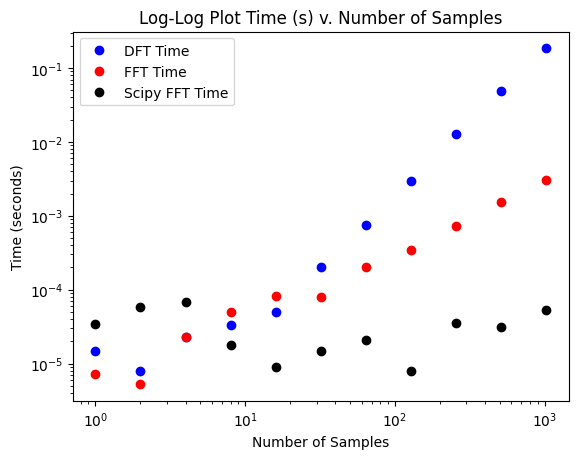

In [11]:
## Performance Testing
import time

lengths = [2**i for i in range(0,10+1)] # don't go much higher than 15, i tried 20 and it was still running after 3 hours.
times = []

for length in lengths:

    x = np.random.random(length) + 1j * np.random.random(length)

    start = time.time()
    dftx = naive_dft(x)
    duration_dft = time.time() - start

    start = time.time()
    fftx = fft(x)
    duration_fft = time.time() - start

    start = time.time()
    scfftx = scipy.fft.fft(x)
    duration_scfft = time.time() - start

    print(f"Recorded Time for {length} Samples...")
    times.append((length, duration_dft, duration_fft, duration_scfft))

print(times)

plt.plot(lengths, [t[1] for t in times], 'o', color='b', label="DFT Time")
plt.plot(lengths, [t[2] for t in times], 'o', color='r', label="FFT Time")
plt.plot(lengths, [t[3] for t in times], 'o', color='k', label="Scipy FFT Time")  
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
plt.title("Log-Log Plot Time (s) v. Number of Samples")
plt.xlabel('Number of Samples')
plt.ylabel('Time (seconds)')
plt.show()

/Users/adithyabhaskara/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


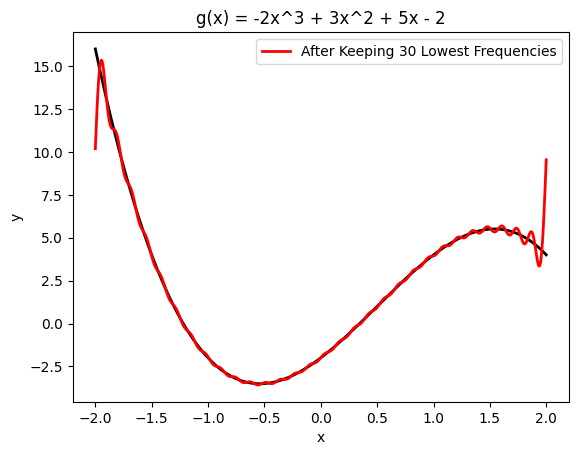

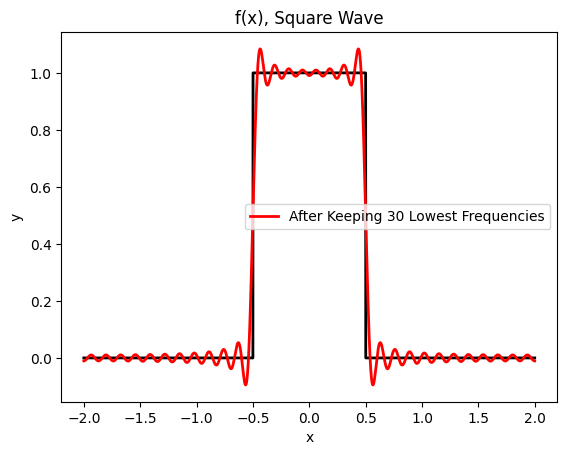

In [12]:
f = lambda x: -2*x**3+3*x**2+5*x-2
X = np.linspace(-2,2,1024)

fftsample = fft(f(X))

k = 30
filterk = keep_k_lowest_freqs(fftsample, k)

plt.plot(X, f(X), color='k', linewidth=2)
plt.plot(X, scipy.fft.ifft(filterk), color='r', linewidth=2, label=f'After Keeping {k} Lowest Frequencies')
plt.title("g(x) = -2x^3 + 3x^2 + 5x - 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='best')
plt.savefig("cubic.png")
plt.show()

f = lambda x: 1 if -0.5 <= x <= 0.5 else 0
X = np.linspace(-2,2,2**15)

fftsample = fft(np.vectorize(f)(X))

k = 30
filterk = keep_k_lowest_freqs(fftsample, k)

plt.plot(X, np.vectorize(f)(X), color='k', linewidth=2)
plt.plot(X, scipy.fft.ifft(filterk), color='r', linewidth=2, label=f'After Keeping {k} Lowest Frequencies')
plt.title("f(x), Square Wave")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='best')
plt.savefig("squarewave.png")
plt.show()